1. Calculo de probabilidad.

Punto 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:

def punto1(indi_el):
    
    N = 100000
    cumplio = 0
    ori = np.array([1, 2, 3, 4])
    total = np.tile(ori, 13)
    cartascc = np.delete(total, indi_el)
    cant=5-len(indi_el)
    for i in range(N):
        cartas=np.copy(cartascc)
        np.random.shuffle(cartas)
        cartas_tomo = cartas[:cant] 
        
        num_esp = 0
        for carta in cartas_tomo:
            if carta%3 ==0:
                # Es un rey
                num_esp +=1 

        if num_esp==cant:
            cumplio +=1
    prob=cumplio/N*100
    return prob


In [14]:
a=punto1([2,6])
print(a)

b=punto1([2,6,10])
print(b)

c=punto1([2,6,10,14])
print(c)

0.882
3.819
18.783


Punto 2

P(C)=P(C/V)P(E)+P(C/nV)P(E)

P(C)=0.2x0.6+0.9x0.6=0.66 

p(C)=66%

2. Distribuciones de probabilidad discretas


In [16]:
def punto1_2(N):
    x1=np.arange(0,N+1)
    n=N
    p=1/5
    f= lambda N: np.math.factorial(n)/(np.math.factorial(n-x)*np.math.factorial(x))*p**x*(1-p)**(1-x)
    P=np.zeros(N+1)
    for i in x1:
        P[i]=f(i)
    plt.scatter(x1,P)
    plt.show()

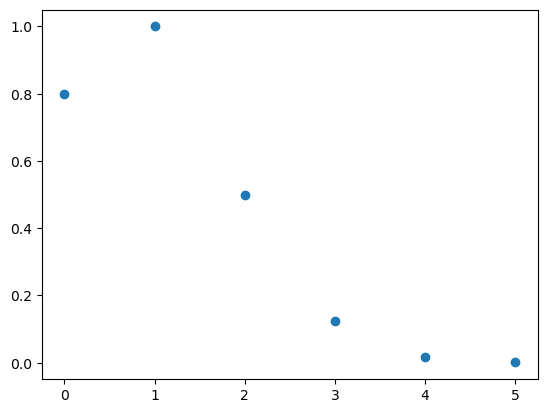

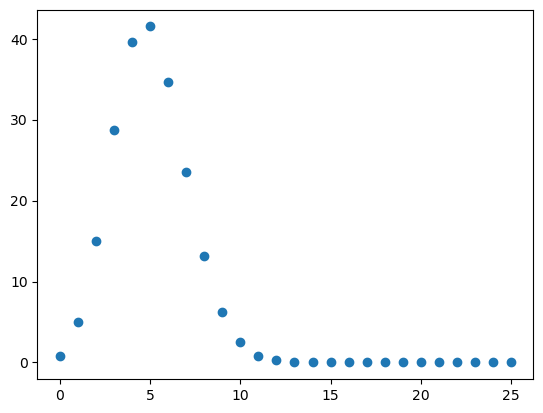

In [18]:
punto1_2(5)
punto1_2(25)

In [ ]:
def punto1_2(N):
    x1=np.linspace(0,1,1000)
    n=N
    p=1/5
    
    P=np.zeros(N+1)
    for i in x1:
        P[i]=f(i)
    plt.scatter(x1,P)
    plt.show()